In [48]:
# Cooperativa Hidrica 
# Análisis de Consumo de Agua
# la problematica actual es que la cisterna que bombea agua a la ciudad suele quedarse sin, debido 
# al consumo de los habitantes. 

In [49]:
# imports
import pandas as pd
import numpy as np
import seaborn as sbn
import datetime
import matplotlib as plot
import matplotlib.pyplot as plt
from IPython.display import display
import panel
panel.extension('tabulator')
import hvplot.pandas

In [50]:
# Data import 
#train_df = pd.read_csv("resources/Historico agua potable2021_30032022.csv", delimiter=";")
train_consumo = pd.read_csv("resources/Historial de Consumos Agua.csv", delimiter="," , thousands=".")
# train_test = pd.read_csv("resources/Historial_Agua.csv")

In [51]:
""""
Tenemos dos datasets:
1- Referido a la ciudad de XX , en el cual se encuentra la cisterna que produce agua potable.
    1.1 Conocer los periodos de mas consumo para la cisterna.
    1.2 Buscar correlación entre las variables de consumo, como periodo de tiempo, temperatura, humedad y la cisterna.
2- El dataset de consumo de agua, donde se encuentra el historial de consumos de agua de la ciudad.
    2.1 Conocer las cuentas que mas consumen
    2.2 En que periodos consumen mas agua.
"""

'"\nTenemos dos datasets:\n1- Referido a la ciudad de XX , en el cual se encuentra la cisterna que produce agua potable.\n    1.1 Conocer los periodos de mas consumo para la cisterna.\n    1.2 Buscar correlación entre las variables de consumo, como periodo de tiempo, temperatura, humedad y la cisterna.\n2- El dataset de consumo de agua, donde se encuentra el historial de consumos de agua de la ciudad.\n    2.1 Conocer las cuentas que mas consumen\n    2.2 En que periodos consumen mas agua.\n'

In [52]:
#display(train_consumo.head(5))

# Total de cuentas que posee o medidores
total_cuentas = train_consumo['Cuenta'].count()

print("Total de lecturas: ", total_cuentas)

# Total de cuentas que posee o medidores unicas, descarta duplicados
total_cuentas_unicas = train_consumo['Cuenta'].nunique()
print("Cantidad de cuentas " , total_cuentas_unicas)


#
consumo_max =  train_consumo['Consumo'].max()
print("Consumo maximo en m3: ", consumo_max)

train_consumo.sort_values("Consumo", inplace = True,ascending=False)

display("La  Cuenta con mayor consumo")
display(train_consumo.head(1))

display("cuenta con consumo maximo:",train_consumo.where(train_consumo['Cuenta']== 46816).dropna().head(5).reset_index())

# Convierto a String Periodo
train_consumo['Periodo'] = train_consumo['Periodo'].astype("string")



Total de lecturas:  176204
Cantidad de cuentas  7681
Consumo maximo en m3:  1613


'La  Cuenta con mayor consumo'

,Periodo,Fecha,Cuenta,Consumo
120476,jul-21,19/07/2021,46816,1613


'cuenta con consumo maximo:'

,index,Periodo,Fecha,Cuenta,Consumo
0,120476,jul-21,19/07/2021,46816.0,1613.0
1,112257,jun-21,17/06/2021,46816.0,1579.0
2,35836,jun-20,17/06/2020,46816.0,1506.0
3,125241,ago-21,17/08/2021,46816.0,1473.0
4,43938,jul-20,20/07/2020,46816.0,1457.0


<AxesSubplot:title={'center':'Cuentas con mayor consumo periodo 2021-2022'}, xlabel='Cuenta'>

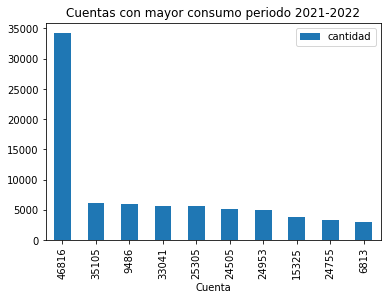

In [53]:
d = train_consumo.groupby(by=['Cuenta']).Consumo.agg(cantidad=('sum')).sort_values(by='cantidad', ascending=False).head(10)
#d = train_consumo.groupby(by=['Cuenta']).Consumo.agg(['sum', 'count']).sort_values(by='sum', ascending=False).head(10)
plot_consumo = d.plot(kind="bar", title="Cuentas con mayor consumo periodo 2021-2022")
fig = plt.gcf()
fig.savefig('cuentas_mayor_consumo.png')
display(plot_consumo)

In [54]:
train_consumo["Fecha"] = train_consumo["Fecha"].astype(str)
#train_consumo["Fecha"] = train_consumo["Fecha"].astype("datetime64[ns]")
train_consumo['Fecha'] = pd.to_datetime(train_consumo['Fecha'], format="%d/%m/%Y")
#train_consumo["Fecha"] = train_consumo["Fecha"].astype("datetime64[ns]")
train_consumo.dtypes


Periodo            string
Fecha      datetime64[ns]
Cuenta              int64
Consumo             int64
dtype: object

c:\Users\migue\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:48: UserWarning: Parsing '31/12/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return self._cmp_method(other, operator.lt)


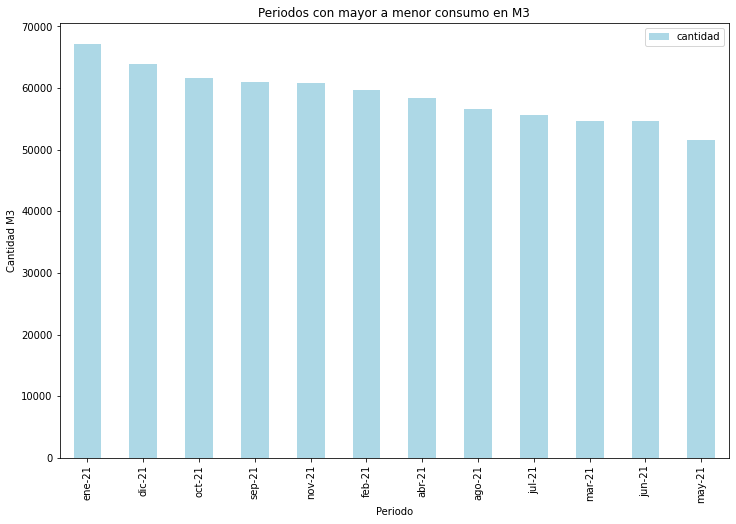

In [76]:

train_consumo.where((train_consumo.Fecha > '01/01/2021') & (train_consumo.Fecha < '31/12/2021'))\
    .groupby(by=['Periodo']).Consumo.agg(cantidad=('sum'))\
        .sort_values(by='cantidad', ascending=False).head(12)\
            .plot(kind="bar", title="Periodos con mayor a menor consumo en M3", color="lightblue",ylabel="Cantidad M3" )

fig = plt.gcf()
fig.set_size_inches(12,8)
fig.savefig("periodos_mayor_a_meno.png")

In [56]:
# creo la columna periodo2 con mes y año
train_consumo['Periodo2'] = train_consumo['Fecha']
train_consumo['Periodo2'] = train_consumo['Periodo2'].astype("string")
train_consumo['Periodo2'] = train_consumo['Periodo2'].replace(to_replace=("-"), value="", regex=True)
train_consumo['Periodo2'] = train_consumo['Periodo2'].str.slice(start=0, stop=6)
display(train_consumo.head(5))

,Periodo,Fecha,Cuenta,Consumo,Periodo2
120476,jul-21,2021-07-19,46816,1613,202107
112257,jun-21,2021-06-17,46816,1579,202106
35836,jun-20,2020-06-17,46816,1506,202006
125241,ago-21,2021-08-17,46816,1473,202108
43938,jul-20,2020-07-20,46816,1457,202007


In [57]:
train_consumo.dtypes

Periodo             string
Fecha       datetime64[ns]
Cuenta               int64
Consumo              int64
Periodo2            string
dtype: object

In [58]:
import re


tc = train_consumo.where((train_consumo.Fecha > '01/01/2021') & (train_consumo.Fecha < '31/12/2021'))['Consumo'].sum()
r = re.sub("(\d)(?=(\d{3})+(?!\d))", r"\1.", "%.2f" % tc)

consumo_anual = "###Consumo Anual 2021: " + tc.astype(str) + " m3"
print("----", r)
print(consumo_anual)


---- 705.878.00
###Consumo Anual 2021: 705878.0 m3


c:\Users\migue\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:48: UserWarning: Parsing '31/12/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return self._cmp_method(other, operator.lt)


c:\Users\migue\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:48: UserWarning: Parsing '31/12/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return self._cmp_method(other, operator.lt)


,Periodo2,cantidad
0,202101,67178.0
1,202102,59656.0
2,202103,54709.0
3,202104,58471.0
4,202105,51587.0
5,202106,54683.0
6,202107,55700.0
7,202108,56648.0
8,202109,60959.0
9,202110,61560.0


<AxesSubplot:title={'center':'Periodos con mayor consumo'}, xlabel='Periodo 2021', ylabel='Cantidad M3'>

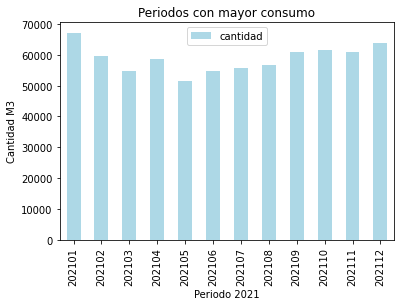

In [59]:
# Analizamos el 2021 ya que tenemos el año completo.

train_consumo.sort_values("Periodo2")
tc = train_consumo.where((train_consumo.Fecha > '01/01/2021') & (train_consumo.Fecha < '31/12/2021'))\
    .groupby(by=['Periodo2'])\
    .Consumo.agg( cantidad=('sum'))\
        .head(12).reset_index()
        #\ .plot(kind="bar", title="Periodos con mayor consumo", color="lightblue", xlabel='Periodo 2021', ylabel="Cantidad M3")
display(tc.head(12))
tc.head(12).plot(kind="bar", title="Periodos con mayor consumo", color="lightblue", xlabel='Periodo 2021', ylabel="Cantidad M3" , x="Periodo2", y="cantidad")

c:\Users\migue\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:48: UserWarning: Parsing '31/12/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return self._cmp_method(other, operator.lt)


,cantidad,media,promedio
Periodo2,,,
202101,67178.0,8.0,10.304955
202102,59656.0,7.0,9.124503
202103,54709.0,7.0,8.356346
202104,58471.0,7.0,8.930961
202105,51587.0,6.0,7.886715
202106,54683.0,6.0,8.343454
202107,55700.0,7.0,8.501221
202108,56648.0,7.0,8.609119
202109,60959.0,7.0,9.226427


c:\Users\migue\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:48: UserWarning: Parsing '31/12/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return self._cmp_method(other, operator.lt)


<AxesSubplot:title={'center':'Periodos con mayor consumo'}, xlabel='Periodo 2021'>

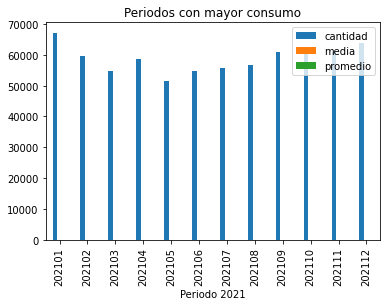

In [60]:
train_consumo.sort_values("Fecha")
display(train_consumo.where((train_consumo.Fecha > '01/01/2021') & (train_consumo.Fecha < '31/12/2021')).groupby(by=['Periodo2'])\
    .Consumo.agg( cantidad=('sum'), media=('median'), promedio=('mean'))\
        .head(12))

train_consumo.sort_values("Fecha")
train_consumo.where((train_consumo.Fecha > '01/01/2021') & (train_consumo.Fecha < '31/12/2021')).groupby(by=['Periodo2'])\
    .Consumo.agg( cantidad=('sum'), media=('median'), promedio=('mean'))\
        .head(12)\
            .plot(kind="bar", title="Periodos con mayor consumo",  xlabel='Periodo 2021')

In [61]:
# Para analizar por separado los meses.
train_consumo['periodo_mes'] = train_consumo['Fecha'].dt.month
train_consumo.head(10)
train_consumo[['Consumo','periodo_mes','Cuenta']].corr("pearson")

,Consumo,periodo_mes,Cuenta
Consumo,1.000000,0.001010,-0.005077
periodo_mes,0.001010,1.000000,0.010675
Cuenta,-0.005077,0.010675,1.000000


In [62]:
# vamos a categorizar los clientes de acuerdo a su consumo.
# observamos la tanto la media como el promedio mensual es entre 8 y 10 vamos poner como categoria principal a Clientes con consumo bajo los que
# van desde 11 a 100 consumo medio y los que consumen 101 en adelante los considaremos como industria.
d = train_consumo.where(train_consumo.Consumo > 100 ).dropna()
dd = d['Cuenta']
dd.size

## creando ConsumoGroup
bins= [0,10,100,2000 ]
labels = ['residencial','comercio','industria']
train_consumo['ConsumoGroup'] = pd.cut(train_consumo['Consumo'], bins=bins, labels=labels, right=False)

labels = ['1','2','3']
train_consumo['ConsumoCategoria'] = pd.cut(train_consumo['Consumo'], bins=bins, labels=labels, right=False)
train_consumo.head(10)


,Periodo,Fecha,Cuenta,Consumo,Periodo2,periodo_mes,ConsumoGroup,ConsumoCategoria
120476,jul-21,2021-07-19,46816,1613,202107,7,industria,3
112257,jun-21,2021-06-17,46816,1579,202106,6,industria,3
35836,jun-20,2020-06-17,46816,1506,202006,6,industria,3
125241,ago-21,2021-08-17,46816,1473,202108,8,industria,3
43938,jul-20,2020-07-20,46816,1457,202007,7,industria,3
55270,sep-20,2020-09-18,46816,1447,202009,9,industria,3
87884,feb-21,2021-02-18,46816,1437,202102,2,industria,3
63153,oct-20,2020-10-20,46816,1433,202010,10,industria,3
30788,may-20,2020-05-20,46816,1424,202005,5,industria,3
101452,abr-21,2021-04-20,46816,1390,202104,4,industria,3


c:\Users\migue\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:48: UserWarning: Parsing '31/12/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return self._cmp_method(other, operator.lt)


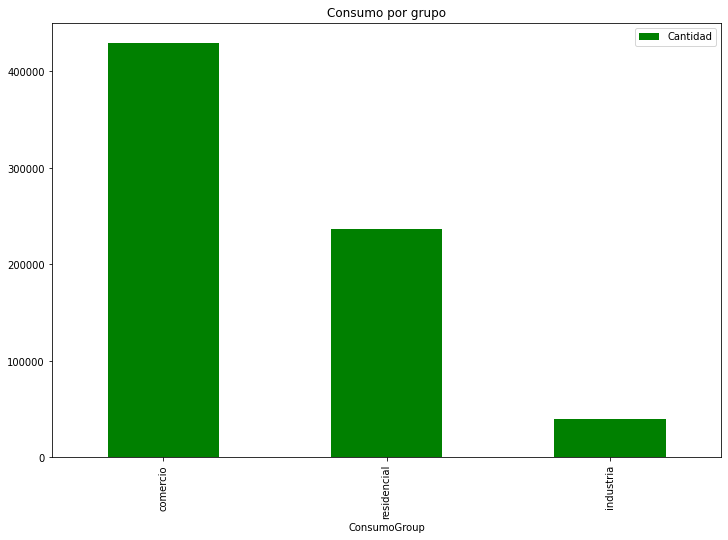

In [63]:
train_consumo.where((train_consumo.Fecha > '01/01/2021') & (train_consumo.Fecha < '31/12/2021'))\
.groupby(by=['ConsumoGroup']).Consumo.agg(Cantidad=('sum'))\
    .sort_values(by='Cantidad', ascending=False)\
        .plot(kind="bar", title="Consumo por grupo", color="green")
fig = plt.gcf()
fig.set_size_inches(12,8)
fig.savefig('consumos.png')

In [64]:
# Representación grafica de consumo, de acuerdo cada categoria.


vals = train_consumo.where((train_consumo.Fecha > '01/01/2021') & (train_consumo.Fecha < '31/12/2021'))\
.groupby(by=['ConsumoGroup']).Consumo.agg(Cantidad=('sum')).sort_values(by='Cantidad', ascending=False)

display("consumo por categoria", vals)

display("ConsumoGroup::")


"""
comercio = vals.Cantidad[0]
residencial =  vals.Cantidad[1]
Industria =  vals.Cantidad[2]

width = 0.55       
pip install virtualenv
fig, ax = plt.subplots()

ax.bar(labels, vals.Cantidad, width, label='Consumos')

ax.set_ylabel('Cantidad de m3 de consumo')
ax.set_title('Consumo por Categoria')
ax.legend()

plt.show()"""

c:\Users\migue\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:48: UserWarning: Parsing '31/12/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return self._cmp_method(other, operator.lt)


'consumo por categoria'

,Cantidad
ConsumoGroup,
comercio,429127.0
residencial,236518.0
industria,40233.0


'ConsumoGroup::'

"\ncomercio = vals.Cantidad[0]\nresidencial =  vals.Cantidad[1]\nIndustria =  vals.Cantidad[2]\n\nwidth = 0.55       \npip install virtualenv\nfig, ax = plt.subplots()\n\nax.bar(labels, vals.Cantidad, width, label='Consumos')\n\nax.set_ylabel('Cantidad de m3 de consumo')\nax.set_title('Consumo por Categoria')\nax.legend()\n\nplt.show()"

c:\Users\migue\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:48: UserWarning: Parsing '31/12/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return self._cmp_method(other, operator.lt)


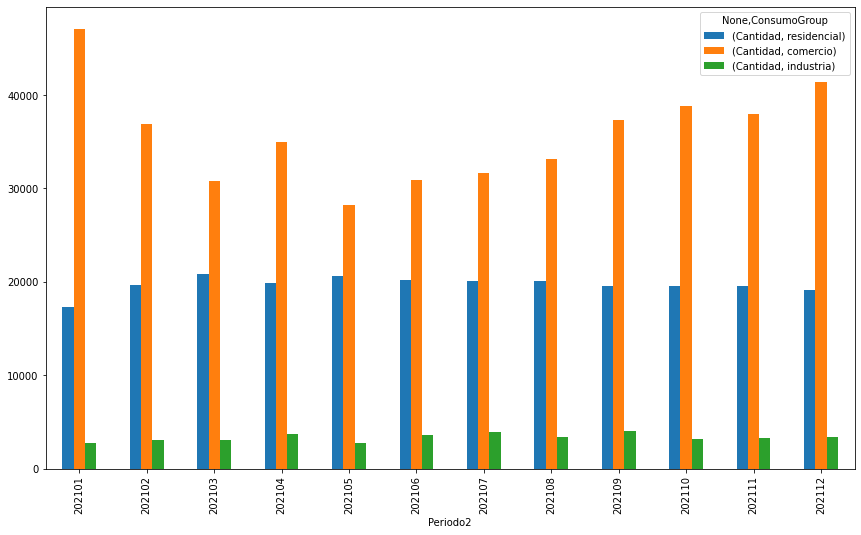

In [65]:
consumo_categ = train_consumo.where((train_consumo.Fecha > '01/01/2021') & (train_consumo.Fecha < '31/12/2021'))\
.groupby(by=['ConsumoGroup', 'Periodo2']).Consumo.agg(Cantidad=('sum'))\
    .sort_values(by='Cantidad', ascending=False).unstack('ConsumoGroup')

consumo_categ.plot.bar()
fig = plt.gcf()
fig.set_size_inches(14.5, 8.5)
fig.savefig("consumo_x_grupo_x_periodo.png")

In [66]:
display(consumo_categ)

Cantidad                   
ConsumoGroup residencial comercio industria
Periodo2                                   
202101           17287.0  47098.0    2793.0
202102           19653.0  36895.0    3108.0
202103           20844.0  30810.0    3055.0
202104           19832.0  34935.0    3704.0
202105           20620.0  28199.0    2768.0
202106           20239.0  30863.0    3581.0
202107           20124.0  31650.0    3926.0
202108           20133.0  33168.0    3347.0
202109           19582.0  37333.0    4044.0
202110           19507.0  38825.0    3228.0
202111           19561.0  37983.0    3272.0
202112           19136.0  41368.0    3407.0

In [67]:
# convirtiendo el data frame interactivo
idf = train_consumo.interactive()

Conclusiones sobre el analisis de consumo


In [68]:
# Define Panel widgets
# pip install jupyter_bokeh
year_slider = panel.widgets.IntSlider(name='Años', start=2021, end=2022, step=1, value=2021)
year_slider

BokehModel(combine_events=True, render_bundle={'docs_json': {'a28e5ec1-30c9-448c-8840-77dfa9687ef0': {'defs': …

IntSlider(end=2022, name='Años', start=2021, value=2021)

In [78]:
"""
1 consumo anual en m3
2 promedio mensual de consumo 

3 .grafica de consumo anual ordenados desde ene-dic

4. grafica de consumo anual ordenados por mes de mayor a menor consumo 

5. Division en Categoria de consumo segun cant m3 consumidos x mes.
5.1 Que categoria consume mas agua  ?

6 .En que periodos estas categorias consumen agua.

"""
#Layout using Template
template = panel.template.FastListTemplate(
    title='Dashboard Análisis de Consumo Anual poblacion', 
    sidebar=[panel.pane.Markdown("# Consumo de la población"), 
             panel.pane.Markdown("#### Analisis del consumo de la poblacion dela ciudad N. \
             El consumo se presenta en cantidad de m3 de acuerdo al consumo de cada cliente, donde se los categorizaron de acuerdo al consumo presentado."), 
             panel.pane.JPG('agua_consumo.jpg', sizing_mode='scale_both'),
             panel.pane.Markdown("## Settings"),   
             year_slider],

          main= [     
            # (panel.pane.JPG('agua_consumo.jpg', width=50, height=30),           
            panel.Row(panel.pane.JPG('agua_consumo.jpg', width=50, height=30),
                  consumo_anual),            
            panel.Row("####Consumo Anual agrupado por categoria:"),
            panel.Row(
                  panel.Column(panel.pane.PNG('consumos.png', width=500, height=500) ),
                  panel.Column(vals)),
            panel.Row("####Consumo Mensual por categoria:"),      
            panel.Row(
                  panel.Column(panel.pane.PNG('consumo_x_grupo_x_periodo.png', sizing_mode='scale_both') )),
            panel.Row("### Consumo anual ordeneado de Mayor a Menor"),
            panel.Row(
                  panel.pane.PNG("periodos_mayor_a_meno.png"))
          ],
    accent_base_color="#28d8b3",
    header_background="#48d8b3",
)
template.show()
template.servable();

Launching server at http://localhost:61783
